In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot one orbit of collocations

In [3]:
import glob
import match

collocations = glob.glob("/home/simonpf/Dendrite/UserAreas/Simon/cloud_collocations/collocations/*2008*.pckl")
c = match.Collocation.load(collocations[40])

['MYD021KM.A2008005.1445.006.2012066161242.hdf', 'MYD021KM.A2008005.1450.006.2012066161241.hdf', 'MYD021KM.A2008005.1455.006.2012066161257.hdf', 'MYD021KM.A2008005.1500.006.2012066161344.hdf', 'MYD021KM.A2008005.1505.006.2012066161352.hdf', 'MYD021KM.A2008005.1510.006.2012066161336.hdf', 'MYD021KM.A2008005.1515.006.2012066161349.hdf', 'MYD021KM.A2008005.1520.006.2012066161423.hdf', 'MYD021KM.A2008005.1525.006.2012066161417.hdf', 'MYD021KM.A2008005.1530.006.2012066161414.hdf', 'MYD021KM.A2008005.1535.006.2012066161436.hdf', 'MYD021KM.A2008005.1540.006.2012066161404.hdf', 'MYD021KM.A2008005.1545.006.2012066161443.hdf', 'MYD021KM.A2008005.1550.006.2012066161420.hdf', 'MYD021KM.A2008005.1555.006.2012066161345.hdf', 'MYD021KM.A2008005.1600.006.2012066161329.hdf', 'MYD021KM.A2008005.1605.006.2012066161314.hdf', 'MYD021KM.A2008005.1610.006.2012066161411.hdf', 'MYD021KM.A2008005.1615.006.2012066161406.hdf']
/home/simonpf/Dendrite/UserAreas/Simon/cloud_collocations/satellite_data/MYD03/MYD03*.h

In [4]:
lons, lats, data = c.get_modis_orbit(10, bands = [1, 4, 3])

65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
9167.0 32767 65535
14365.0 32767 65535
13492.0 32767 65535
13967.0 32767 65535
23278.0 32767 65535
21844.0 32767 65535
14790.0 32767 65535
24039.0 32767 65535
22657.0 32767 65535
18741.0 32767 65535
30790.0 32767 65535
29265.0 32767 65535
20953.0 32767 65535
31561.0 32767 65535
31168.0 32767 65535
22025.0 32767 65535
65528.0 32767 65535
65528.0 32767 65535
18086.0 32767 65535
29410.0 32767 65535
27841.0 32767 65535
16538.0 32767 65535
27045.0 32767 65535
25523.0 32767 65535
11419.0 32767 65535
17576.0 32767 65535
15468.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
6

### Resample the MODIS swath

In [58]:
import pyresample
from pyresample import geometry
crs = ccrs.PlateCarree()
area = geometry.AreaDefinition("world_map", "World map", "projection",
                               crs.proj4_params, 4000, 2000, [-180, -90, 180, 90])
swath = geometry.SwathDefinition(lats = lats, lons = lons)


img_r = pyresample.kd_tree.resample_nearest(swath, data[0, :, :],
                                            area, radius_of_influence = 100000,
                                            fill_value = -9999.0)
img_g = pyresample.kd_tree.resample_nearest(swath, data[1, :, :],
                                            area, radius_of_influence = 100000,
                                            fill_value = -9999.0)
img_b = pyresample.kd_tree.resample_nearest(swath, data[2, :, :],
                                            area, radius_of_influence = 100000,
                                            fill_value = -9999.0)

### Get CALIOP footprint

In [6]:
lons_dardar, _ = c.get_lons()
lats_dardar, _ = c.get_lats()

In [7]:
colors[:, :, 0]

/home/simonpf/build/anaconda/lib/python3.6/site-packages/IPython/core/magics/basic.py:344: UserWarning: Error changing shell color schemes.
The 'colors' trait of a ZMQInteractiveShell instance must be any of ['Neutral', 'NoColor', 'LightBG', 'Linux'], but a value of '[:, :, 0]' <class 'str'> was specified.
  color_switch_err('shell')
/home/simonpf/build/anaconda/lib/python3.6/site-packages/IPython/core/magics/basic.py:351: UserWarning: Error changing exception color schemes.
Unrecognized color scheme: [:, :, 0]
Valid schemes: ['NoColor', 'Linux', 'LightBG', 'Neutral', '']
  color_switch_err('exception')
/home/simonpf/build/anaconda/lib/python3.6/site-packages/IPython/core/magics/basic.py:358: UserWarning: Error changing object inspector color schemes.
Unrecognized color scheme: [:, :, 0]
Valid schemes: ['NoColor', 'Linux', 'LightBG', 'Neutral', '']
  color_switch_err('object inspector')


In [69]:
def to_rgba(r, g, b):
    img = np.zeros(r.shape + (4,))
    
    ma = np.nanmax(r)
    mi = np.nanmin(r)
    img[:, :, 0] = (r - mi) / (ma - mi)
    
    ma = np.nanmax(g)
    mi = np.nanmin(g)
    img[:, :, 1] = (g - mi) / (ma - mi)
    
    ma = np.nanmax(b)
    mi = np.nanmin(b)
    img[:, :, 2] = (b - mi) / (ma - mi)
    
    img[:, :, 3] = 1.0
    
    return img

In [63]:
colors.shape

(2000, 4000, 3)

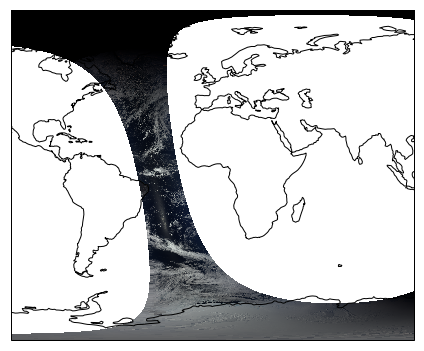

In [71]:
import matplotlib
from matplotlib.colors import Normalize

f = plt.figure(figsize = (6, 6))
crs = ccrs.PlateCarree()
ax = plt.axes(projection = crs)

img_r_1 = np.array(img_r)
img_r_1[img_r == -9999.0] = np.nan
img_g_1 = np.array(img_g)
img_g_1[img_g == -9999.0] = np.nan
img_b_1 = np.array(img_b)
img_b_1[img_b == -9999.0] = np.nan

colors = to_rgba(img_r_1, img_g_1, img_b_1)
colors[img_r == -9999.0, -1] = 0.0

ax.imshow(colors, origin = "upper", extent = [-180.0, 180.0, -90.0, 90.0], transform = crs)
ax.set_xlim([-110, 110])
ax.set_ylim([-90, 90])
#ax.scatter(lons_dardar, lats_dardar, color = 'lightgrey', s = 4)
ax.coastlines(resolution = "110m", lw = 1)
plt.tight_layout()
f.savefig("plots/modis_orbit.png", bbox_inches = "tight")

### Extract collocations

In [81]:
lons_cs = []
lats_cs = []
lats_dardar_cs = []
lons_dardar_cs = []

nh = 10

lons_dardar = c.dardar_file.get_lons()
lats_dardar = c.dardar_file.get_lats()

lons_dardar_cs = []
lats_dardar_cs = []

for mfi, mf in enumerate(c.modis_files):
    
    lons = mf.get_lons()
    lats = mf.get_lats()
    
    inds = np.where((c.distances < 1.0) * (c.collocations[:, 1] == mfi))[0]
    
    for i in inds:
        iao_dardar, _, iao, ixo = c.collocations[i, :]
        if iao > nh:
            lons_cs += [lons[iao - nh : iao + nh + 1,
                             ixo - nh : ixo + nh + 1]]
            lats_cs += [lats[iao - nh : iao + nh + 1,
                             ixo - nh : ixo + nh + 1]]
        lons_dardar_cs += [lons_dardar[iao_dardar]]
        lats_dardar_cs += [lats_dardar[iao_dardar]]
            
lons_cs = np.vstack(lons_cs)
lats_cs = np.vstack(lats_cs)

data_cs = np.ones(lats_cs.shape)
swath_cs = geometry.SwathDefinition(lats = lats_cs, lons = lons_cs)
mask = pyresample.kd_tree.resample_nearest(swath_cs, data_cs,
                                          area, radius_of_influence = 100000,
                                          fill_value = np.nan)
mask = ~np.isnan(mask)

In [82]:
len(lons_dardar_cs)

828

/home/simonpf/build/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


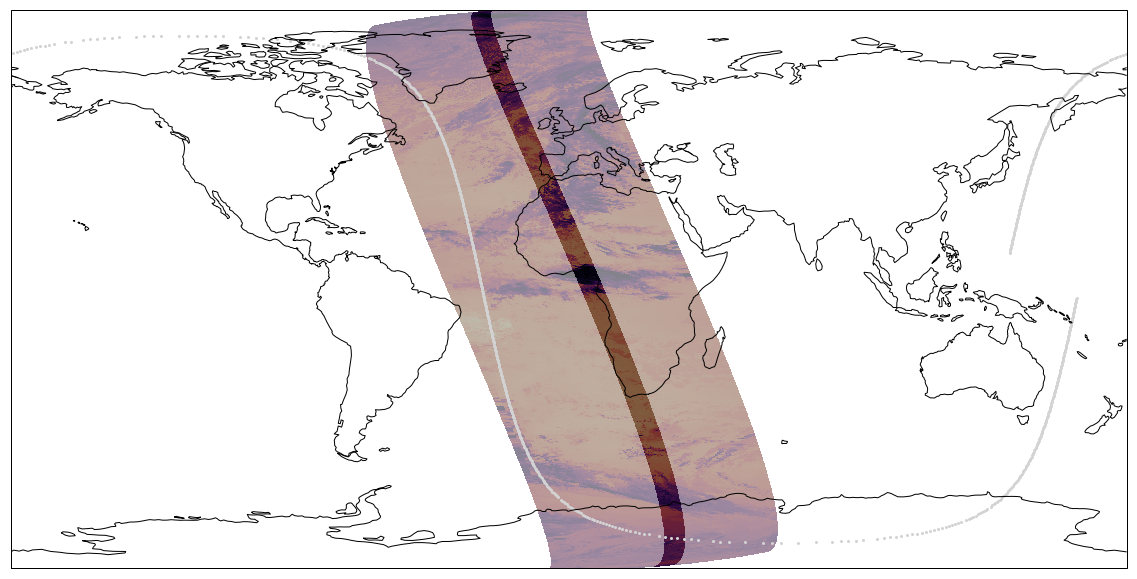

In [83]:
import matplotlib
from matplotlib.colors import Normalize

f = plt.figure(figsize = (20, 12))
crs = ccrs.PlateCarree()
ax = plt.axes(projection = crs)

colors = Normalize(vmin = np.nanmin(img), vmax = np.nanmax(img))(img)
colors = matplotlib.cm.get_cmap("magma")(colors)
colors[np.isnan(img), -1] = 0.0
colors *= 0.5
colors[mask, -1] = 1.0 

ax.imshow(colors, origin = "upper", extent = [-180.0, 180.0, -90.0, 90.0], transform = crs)
#ax.scatter(lons_dardar, lats_dardar, color = 'lightgrey', s = 4)
ax.scatter(lons_dardar_cs, lats_dardar_cs, color = 'lightgrey', s = 4)
ax.coastlines(resolution = "110m")
f.savefig("plots/collocations_1.png")

## Nearside perspective

In [84]:
import pyresample
from pyresample import geometry

lons, lats, data = c.get_modis_orbit(10, bands = [32])
crs = ccrs.NearsidePerspective(central_longitude=-30.0, central_latitude=0.0, satellite_height=35785831)
x_l, x_u = crs.x_limits
y_l, y_u = crs.y_limits
area = geometry.AreaDefinition("world_map", "World map", "projection",
                               crs.proj4_params, 4000, 2000, [x_l, y_l , x_u , y_u])
swath = geometry.SwathDefinition(lats = lats, lons = lons)
img = pyresample.kd_tree.resample_nearest(swath, data[0, :, :],
                                          area, radius_of_influence = 50000,
                                          fill_value = np.nan)

16177.0 32767 65535
17126.0 32767 65535
16704.0 32767 65535
13073.0 32767 65535
13689.0 32767 65535
15318.0 32767 65535
13251.0 32767 65535
17866.0 32767 65535
17116.0 32767 65535
65534.0 32767 65535
18904.0 32767 65535
16150.0 32767 65535
15387.0 32767 65535
13277.0 32767 65535
11834.0 32767 65535
11483.0 32767 65535
12910.0 32767 65535
15984.0 32767 65535
16571.0 32767 65535


/home/simonpf/build/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


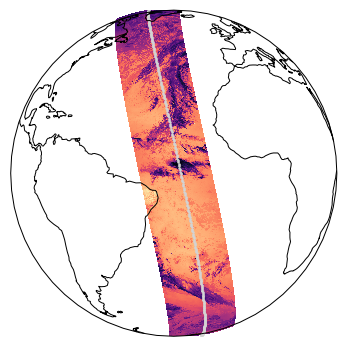

In [91]:
import matplotlib
from matplotlib.colors import Normalize

f = plt.figure(figsize = (6, 6))
ax = plt.axes(projection = crs)

colors = Normalize(vmin = np.nanmin(img), vmax = np.nanmax(img))(img)
colors = matplotlib.cm.get_cmap("magma")(colors)
colors[np.isnan(img), -1] = 0.0

ax.imshow(colors, origin = "upper", extent = [x_l, x_u, y_l, y_u], transform = crs)
ax.set_xlim([x_l, x_u])
ax.set_ylim([y_l, y_u])

ax.scatter(lons_dardar[::41], lats_dardar[::41], color = 'lightgrey', s = 2,
           transform = ccrs.Geodetic(), label = "Cloudsat Footprint")
ax.coastlines(resolution = "110m")
f.savefig("plots/collocations_nearside_0.png", bbox_inches = "tight")

In [18]:
data_cs = np.ones(lats_cs.shape)
swath_cs = geometry.SwathDefinition(lats = lats_cs, lons = lons_cs)
mask = pyresample.kd_tree.resample_nearest(swath_cs, data_cs,
                                          area, radius_of_influence = 100000,
                                          fill_value = np.nan)
mask = ~np.isnan(mask)

/home/simonpf/build/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


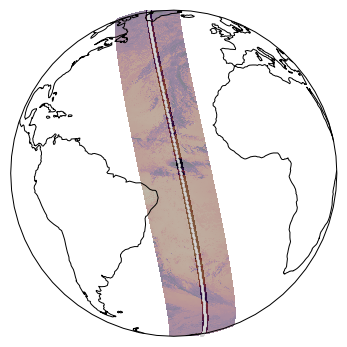

In [92]:
import matplotlib
from matplotlib.colors import Normalize

f = plt.figure(figsize = (6, 6))
ax = plt.axes(projection = crs)

colors = Normalize(vmin = np.nanmin(img), vmax = np.nanmax(img))(img)
colors = matplotlib.cm.get_cmap("magma")(colors)
colors[np.isnan(img), -1] = 0.0
colors *= 0.5
colors[mask, -1] = 2.0

ax.imshow(colors, origin = "upper", extent = [x_l, x_u, y_l, y_u], transform = crs)
ax.set_xlim([x_l, x_u])
ax.set_ylim([y_l, y_u])


ax.scatter(lons_dardar[::41], lats_dardar[::41], color = 'lightgrey', s = 2,
           transform = ccrs.Geodetic(), label = "Cloudsat Footprint")
ax.coastlines(resolution = "110m")
f.savefig("plots/collocations_nearside_1.png", bbox_inches = "tight")

## Radar and Lidar curtains


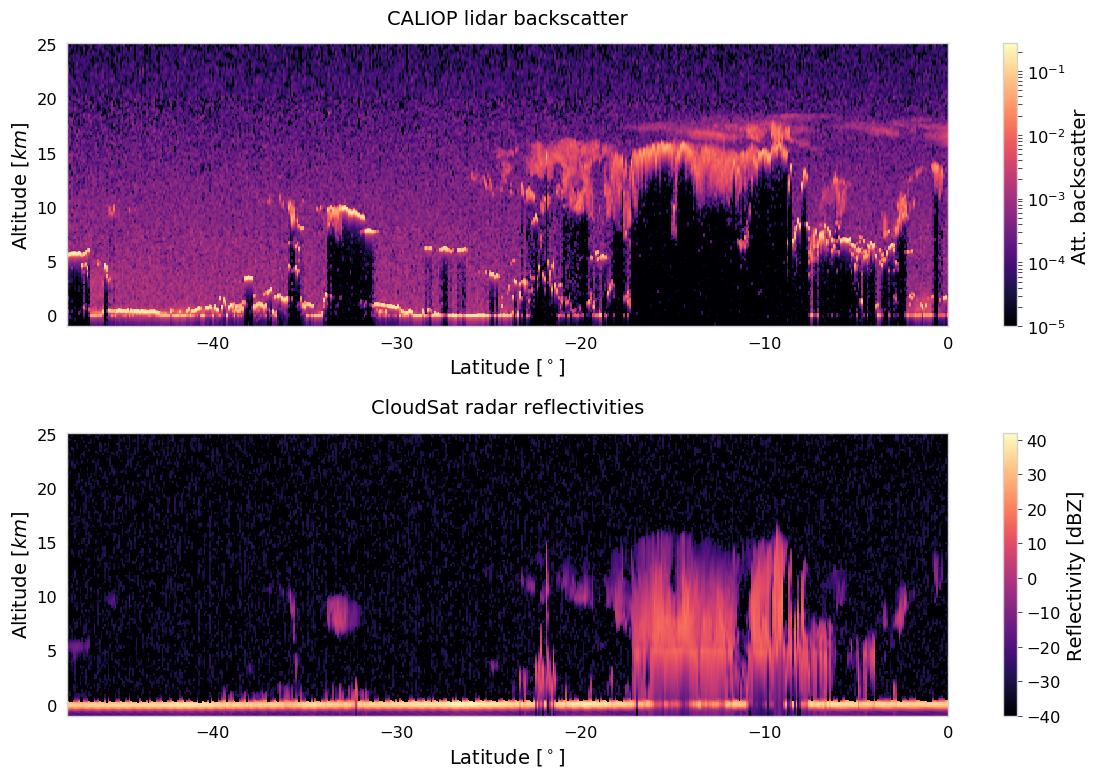

In [73]:
from matplotlib.colors import LogNorm

n0 = 0
n = 5000

lats_dardar = c.dardar_file.get_lats()[:n:10]

rr  = c.dardar_file.get_cloudsat_reflectivity()[n0:n + n0:10, :]
cbs = c.dardar_file.get_caliop_backscatter()[n0:n + n0:10, :]
z = c.dardar_file.get_height()

kernel = 0.2 * np.ones(5)
cbs_smooth = np.zeros(cbs.shape)

for i in range(n // 10):
    cbs_smooth[i, :] = np.convolve(cbs[i, :], kernel, "same")

    
with plt.style.context(('/home/simonpf/.config/matplotlib/notebook')):
    f, axs = plt.subplots(2, 1, figsize = (12, 8))
    img = axs[0].pcolormesh(lats_dardar, z, np.maximum(cbs_smooth, 1e-5).T, norm = LogNorm())
    axs[0].set_title("CALIOP lidar backscatter")
    axs[0].set_xlabel("Latitude $[^\circ]$")
    axs[0].set_ylabel("Altitude $[km]$")
    plt.colorbar(img, label = "Att. backscatter", ax = axs[0])
    img = axs[1].pcolormesh(lats_dardar, z, np.maximum(rr.T / 100.0, -40.0))
    axs[1].set_title("CloudSat radar reflectivities")
    axs[1].set_xlabel("Latitude $[^\circ]$")
    axs[1].set_ylabel("Altitude $[km]$")
    plt.colorbar(img, label = "Reflectivity [dBZ]", ax = axs[1])
    plt.tight_layout()
    f.savefig("plots/active.png")

In [18]:
cbs.max()

2.7337313

## Random collocations

In [137]:
nh = 20
n_found = 0

lats_cs_modis = []
lons_cs_modis = []
lats_cs_dardar = []
lons_cs_dardar = []

modis_r   = []
modis_g   = []
modis_b   = []
modis_4u  = []
modis_8u  = []
modis_13u = []
csrr = []
cbs  = []

cs_ref = c.dardar_file.get_cloudsat_reflectivity()
cal_bs = c.dardar_file.get_caliop_backscatter()

while n_found < 4:
    ind = np.random.randint(0, c.collocations.shape[0])
    iao_dardar, mfi, iao, ixo = c.collocations[ind]
    mf = c.modis_files[mfi]
    df = c.dardar_file
    
    mr = mf.get_radiances(band = 1, ao_start = iao - nh, ao_end = iao + nh + 1,
                     xo_start = ixo - nh, xo_end = ixo + nh + 1)
    mg = mf.get_radiances(band = 4, ao_start = iao - nh, ao_end = iao + nh + 1,
                     xo_start = ixo - nh, xo_end = ixo + nh + 1)
    mb = mf.get_radiances(band = 3, ao_start = iao - nh, ao_end = iao + nh + 1,
                     xo_start = ixo - nh, xo_end = ixo + nh + 1)
    if np.all(np.stack([~np.isnan(m) for m in [mr, mg, mb]])):
        modis_r += [mr]
        modis_g += [mg]
        modis_b += [mb]
        modis_4u += [mf.get_radiances(band = 21, ao_start = iao - nh, ao_end = iao + nh + 1,
                     xo_start = ixo - nh, xo_end = ixo + nh + 1)]
        modis_8u += [mf.get_radiances(band = 29, ao_start = iao - nh, ao_end = iao + nh + 1,
                     xo_start = ixo - nh, xo_end = ixo + nh + 1)]
        modis_13u += [mf.get_radiances(band = 33, ao_start = iao - nh, ao_end = iao + nh + 1,
                     xo_start = ixo - nh, xo_end = ixo + nh + 1)]
        csrr += [cs_ref[iao_dardar-nh: iao_dardar+nh+1, :]]
        cbs  += [cal_bs[iao_dardar-nh: iao_dardar+nh+1, :]]
        
        lons_cs_modis += [mf.get_lons()[iao - nh : iao + nh + 1, ixo - nh : ixo + nh + 1]]
        lats_cs_modis += [mf.get_lats()[iao - nh : iao + nh + 1, ixo - nh : ixo + nh + 1]]
        lons_cs_dardar += [df.get_lons()[iao_dardar - nh : iao_dardar + nh + 1]]
        lats_cs_dardar += [df.get_lats()[iao_dardar - nh : iao_dardar + nh + 1]]
        n_found += 1

15451.0 32767 65535
25432.0 32767 65535
24132.0 32767 65535
2669.0 32767 65535
16660.0 32767 65535
21967.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
957.0 32767 65535
2047.0 32767 65535
2942.0 32767 65535
2657.0 32767 65535
16695.0 32767 65535
22167.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
5945.0 32767 65535
9191.0 32767 65535
8474.0 32767 65535
2585.0 32767 65535
14045.0 32767 65535
19360.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
65535.0 32767 65535
4372.0 32767 65535
6424.0 32767 65535
5767.0 32767 65535
2566.0 32767 65535
12400.0 32767 65535
18189.0 32767 65535


In [10]:
def to_rgb(r, g, b):
    img = np.zeros(r.shape + (3,))
    
    ma = np.nanmax(r)
    mi = np.nanmin(r)
    img[:, :, 0] = (r - mi) / (ma - mi)
    
    ma = np.nanmax(g)
    mi = np.nanmin(g)
    img[:, :, 1] = (g - mi) / (ma - mi)
    
    ma = np.nanmax(b)
    mi = np.nanmin(b)
    img[:, :, 2] = (b - mi) / (ma - mi)
    
    return img
    

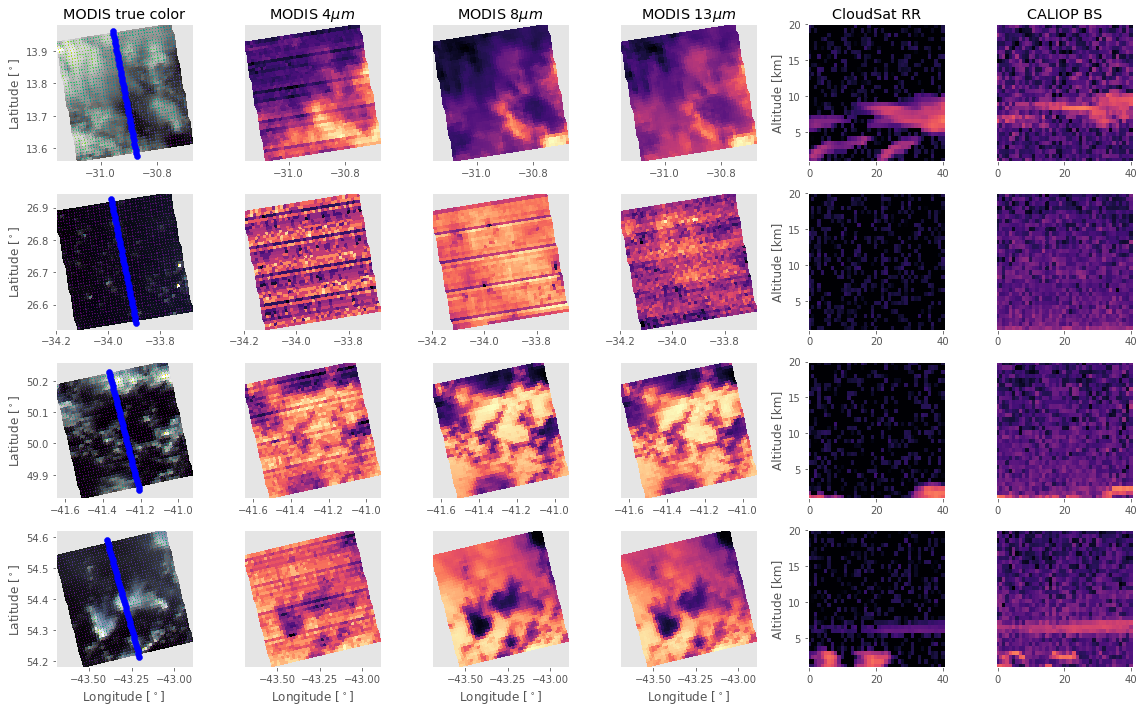

In [141]:
from matplotlib.colors import LogNorm, Normalize
from utils import grid_to_edges_2d

with plt.style.context(('ggplot')):
    f, axs = plt.subplots(4, 6, figsize = (16, 10))

    z = c.dardar_file.get_height()


    for i in range(4):

        ax = axs[i, 0]
        img = to_rgb(modis_r[i], modis_g[i], modis_b[i])
        lo = grid_to_edges_2d(lons_cs_modis[i])
        la = grid_to_edges_2d(lats_cs_modis[i])
        color_tuples = np.array([img[:, :, 0].flatten(),
                                 img[:, :, 1].flatten(),
                                 img[:, :, 2].flatten()]).transpose()
        ax.pcolormesh(lo, la, modis_r[i], color = color_tuples, cmap = None)
        ax.scatter(lons_cs_dardar[i], lats_cs_dardar[i], color = "blue")
        ax.set_ylabel("Latitude $[^\circ]$")
        
        if i == 0:
            ax.set_title("MODIS true color")
        if i == 3:
            ax.set_xlabel("Longitude $[^\circ]$")
            

        ax = axs[i, 1]
        lo = grid_to_edges_2d(lons_cs_modis[i])
        la = grid_to_edges_2d(lats_cs_modis[i])
        ax.pcolormesh(lo, la, modis_4u[i], cmap = "magma")
        ax.yaxis.set_visible(False)
        
        if i == 0:
            ax.set_title("MODIS $4\mu m$")
        if i == 3:
            ax.set_xlabel("Longitude $[^\circ]$")

        ax = axs[i, 2]
        lo = grid_to_edges_2d(lons_cs_modis[i])
        la = grid_to_edges_2d(lats_cs_modis[i])
        ax.pcolormesh(lo, la, modis_8u[i], cmap = "magma")
        ax.yaxis.set_visible(False)
        
        if i == 0:
            ax.set_title("MODIS $8\mu m$")
        if i == 3:
            ax.set_xlabel("Longitude $[^\circ]$")

        ax = axs[i, 3]
        lo = grid_to_edges_2d(lons_cs_modis[i])
        la = grid_to_edges_2d(lats_cs_modis[i])
        ax.pcolormesh(lo, la, modis_13u[i], cmap = "magma")
        ax.yaxis.set_visible(False)

        if i == 0:
            ax.set_title("MODIS $13 \mu m$")
        if i == 3:
            ax.set_xlabel("Longitude $[^\circ]$")

        ax = axs[i, 4]
        x = np.arange(41)
        y = z[::10]
        x, y = np.meshgrid(x, y)
        x = grid_to_edges_2d(x)
        y = grid_to_edges_2d(y)
        
        k = 0.1 * np.ones(10)
        rr = np.array(csrr[i])
        for j in range(rr.shape[0]):
            rr[j, :] = rr[j, :]
        
        ax.pcolormesh(x, y, np.maximum(rr[:, ::10].T / 100.0, -40.0), cmap = "magma")
        ax.set_ylim([1, 20])
        ax.set_ylabel("Altitude [km]")
        
        if i == 0:
            ax.set_title("CloudSat RR")
            
        bs = np.log(np.clip(np.array(cbs[i]), 1e-5, 1e0))
        for j in range(bs.shape[0]):
            bs[j, :] = np.convolve(bs[j, :], k, "same").ravel()

        ax = axs[i, 5]
        x = np.arange(41)
        y = z[::10]
        x, y = np.meshgrid(x, y)
        x = grid_to_edges_2d(x)
        y = grid_to_edges_2d(y)
        ax.pcolormesh(x, y, bs[:, ::10].T, cmap = "magma", norm = Normalize(vmin = np.log(1e-5), vmax = 0))#np.maximum(bs[:, ::10], 1e-5).T, norm = LogNorm(vmin = 1e-5, vmax = 1e0))
        ax.set_ylim([1, 20])
        ax.yaxis.set_visible(False)
        
        if i == 0:
            ax.set_title("CALIOP BS")

        plt.tight_layout()

f.savefig("plots/collocation_examples.png")

## Scene types

In [94]:
from netCDF4 import Dataset
training_data = "training_data/cloud_collocations.nc"
root = Dataset(training_data, "r")
input  = root.groups["input"]
modis = np.array(input.variables["modis"][:10000, :, :, :])
lons_modis = np.array(input.variables["modis"][:10000, :, :])
output = root.groups["output"]
cth = np.array(output.variables["cth"][:10000,])
cs = np.array(output.variables["cloud_scenario"][:10000, :, :])
ccs = np.array(output.variables["caliop_cloud_scenario"][:10000, :, :])
root.close()

In [95]:
from data_processing import extract_cloud_types
y = extract_cloud_types("training_data/cloud_collocations.nc", 20)

(67374, 41, 22)


In [96]:
y = y[:5000, :]

In [97]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib as mpl
# define the colormap
cmap_caliop   = plt.cm.get_cmap("Paired")
cmap_cloudsat = plt.cm.get_cmap("tab20b")
#cmap_cloudsat.colors = [(0.5, 0.5, 0.5)] + list(cmap_cloudsat.colors)
# extract all colors from the .jet map

labels_caliop = ["No signal + molecular", "Cloud",
                 "Aerosol", "Stratospheric feature"]
colors_caliop = [(0.7, 0.7, 0.7)] + list(cmap_caliop.colors)
cmap_caliop = ListedColormap(colors_caliop)
legend_elements_caliop = [Patch(facecolor = c, edgecolor = None,  label = l)
                           for (c, l) in zip(cmap_caliop.colors, labels_caliop)]

labels_cloudsat = ["No signal", "Cirrus", "Altostratus", "Altocumulus",
                  "Stratus", "Stratocumulus", "Cumulus", "Deep convection", "Nimbostratus"]
colors_cloudsat = colors_caliop
cmap_cloudsat = ListedColormap(colors_cloudsat)
legend_elements_cloudsat = [Patch(facecolor = c, edgecolor = None,  label = l)
                           for (c, l) in zip(cmap_cloudsat.colors, labels_cloudsat)]

# define the bins and normalize
bounds_caliop   = np.array([-0.5, 3.5, 7.5, 11.5, 12.5])
norm_caliop = mpl.colors.BoundaryNorm(bounds_caliop, 4)
bounds_cloudsat = np.array([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])
norm_cloudsat = mpl.colors.BoundaryNorm(bounds_cloudsat, 9)

In [98]:
cmap_cloudsat(1)

(0.65098039215686276, 0.80784313725490198, 0.8901960784313725, 1.0)

In [100]:
def to_rgb(r, g, b):
    img = np.zeros(r.shape + (3,))
    
    ma = np.nanmax(r)
    mi = np.nanmin(r)
    img[:, :, 0] = (r - mi) / (ma - mi)
    
    ma = np.nanmax(g)
    mi = np.nanmin(g)
    img[:, :, 1] = (g - mi) / (ma - mi)
    
    ma = np.nanmax(b)
    mi = np.nanmin(b)
    img[:, :, 2] = (b - mi) / (ma - mi)
    
    return img

/home/simonpf/build/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: All-NaN slice encountered
  after removing the cwd from sys.path.
/home/simonpf/build/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: All-NaN axis encountered
  """
/home/simonpf/build/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/home/simonpf/build/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN axis encountered
  if __name__ == '__main__':
/home/simonpf/build/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: All-NaN slice encountered
  if sys.path[0] == '':
/home/simonpf/build/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: All-NaN axis encountered
  del sys.path[0]


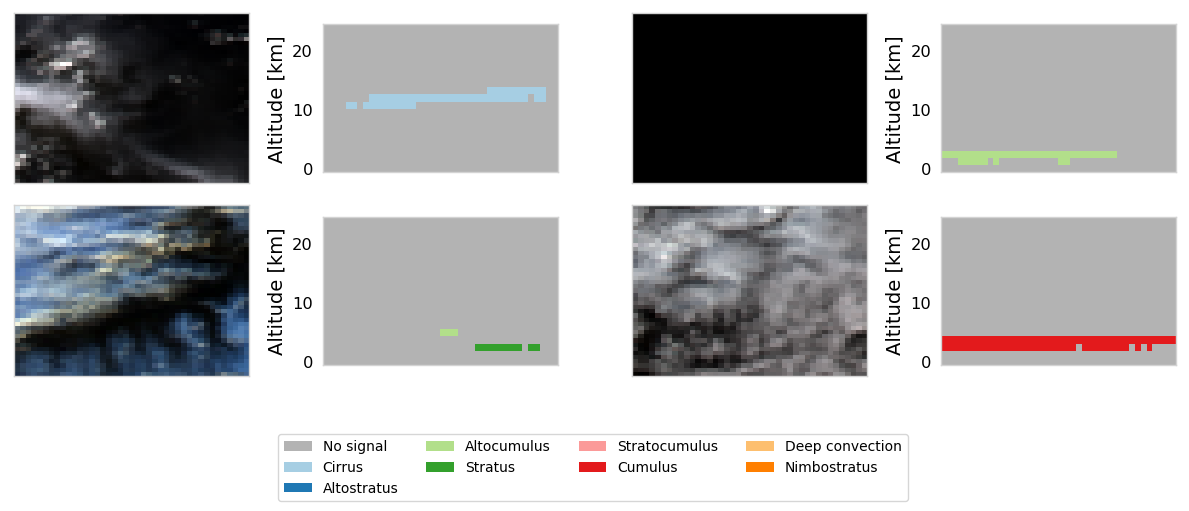

In [101]:
x = np.arange(41)
z = c.dardar_file.get_mean_height(20)
x, z = np.meshgrid(x, z)

types = [1, 3, 4, 6]
with plt.style.context(('/home/simonpf/.config/matplotlib/notebook')):
    
    f, axs = plt.subplots(2, 4, figsize = (12, 4))

    for i in range(4):
        t = types[i]
        ind = np.random.choice(np.where(y[:, t])[0])
        
        ax_0 = axs[(2 * i) // 4, (2 * i) % 4]
        ax_1 = axs[(2 * i) // 4, (2 * i) % 4 + 1]
        
        ax_0.xaxis.set_visible(False)
        ax_1.xaxis.set_visible(False)
        ax_0.set_aspect(1)
        ax_0.yaxis.set_visible(False)
        ax_1.set_ylabel("Altitude [km]")
        ax_1.set_aspect(1)
        
        img = to_rgb(modis[ind, 0], modis[ind, 3], modis[ind, 2])
        
        ax_0.imshow(img, origin = "lower")
        ax_0.grid("off")

        ax_1.pcolormesh(x, z, cs[ind, :, :].T, cmap = cmap_cloudsat, norm = norm_cloudsat)
        ax_1.grid("off")

plt.tight_layout()
axs[1, 2].legend(handles = legend_elements_cloudsat, ncol = 4, bbox_to_anchor = [1.2, -0.3])

In [425]:
f.savefig("plots/cloud_scenario.png", bbox_inches = "tight")

### Cloud tiles

In [139]:
x = np.load("training_data/x_rgb_train.npy")
y = np.load("training_data/y_rgb_train.npy")

In [126]:
def random_rgb_tile_type(x, y, t = 0, n = 10, bands = [0, 3, 2], nh = 20):
    
    maxs = [np.nanmax(x[:, b, :, :]) for b in bands]
    mins = [np.nanmin(x[:, b, :, :]).min() for b in bands]
    
    h = x.shape[2]
    w = x.shape[3]
    
    inds = np.where(np.logical_not(np.any(np.isnan(x[:, bands, :, :]), axis = (1, 2))))[0]
    y = y[inds, :]
    
    image        = np.ones((h * n, w * n, 3))
    for i in range(n):
        for j in range(n):
            inds_2 = inds[np.where(y[:, t] ==  1.0)[0]]
            ind = np.random.choice(inds_2)
            im = x[ind, bands[0], :, :]
            image[i * h + (20 - nh): (i + 1) * h - (20 - nh),
                  j * h + (20 - nh): (j + 1) * h - (20 - nh), 0] \
            = (im[20 - nh: 20 + nh + 1, 20 - nh: 20 + nh + 1] - im.min()) / (im.max() - im.min())
            im = x[ind, bands[1], :, :]
            image[i * h + (20 - nh): (i + 1) * h - (20 - nh),
                  j * h + (20 - nh): (j + 1) * h - (20 - nh), 1] \
            = (im[20 - nh: 20 + nh + 1, 20 - nh: 20 + nh + 1] - im.min()) / (im.max() - im.min())
            im = x[ind, bands[2], :, :]
            image[i * h + (20 - nh): (i + 1) * h - (20 - nh),
                  j * h + (20 - nh): (j + 1) * h - (20 - nh), 2] \
            = (im[20 - nh: 20 + nh + 1, 20 - nh: 20 + nh + 1] - im.min()) / (im.max() - im.min())
            #image[i * h : (i + 1) * h, j * h : (j + 1) * h, 1] = (x[ind, bands[1], :, :] - mins[1]) / (maxs[1] - mins[1])
            #image[i * h : (i + 1) * h, j * h : (j + 1) * h, 2] = (x[ind, bands[2], :, :] - mins[2]) / (maxs[2] - mins[2])
    return image

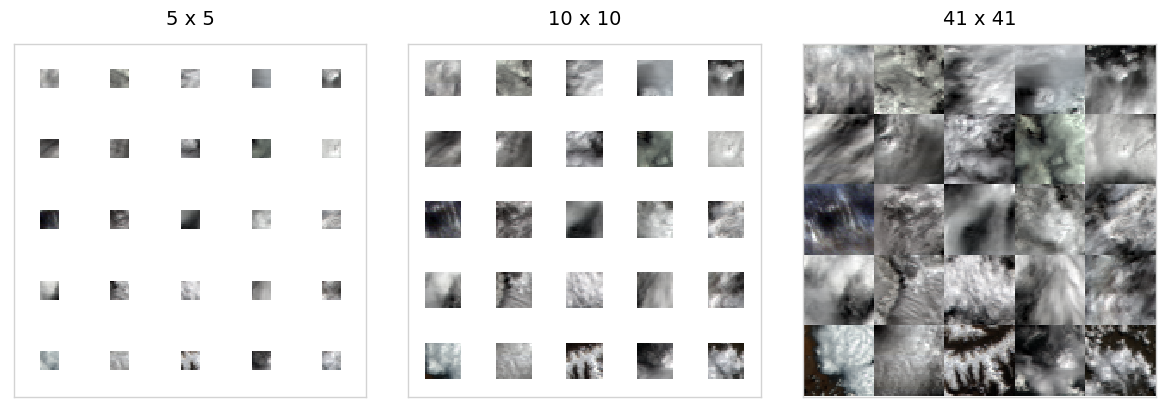

In [137]:
t = 7
nhs = [5, 10, 20]
titles = ["5 x 5", "10 x 10", "41 x 41"]

with plt.style.context(('/home/simonpf/.config/matplotlib/notebook')):
    f, axs = plt.subplots(1, 3, figsize = (12, 4))
    for i, nh in enumerate(nhs):
        np.random.seed(10)
        img = random_rgb_tile_type(x, y, t = t, n = 5, nh = nh, bands = [0, 1, 2])
        axs[i].imshow(img)
        axs[i].set_title(titles[i])
        axs[i].set_aspect(1)
        axs[i].grid("off")
        axs[i].xaxis.set_visible(False)
        axs[i].yaxis.set_visible(False)
plt.tight_layout()
f.savefig("plots/tiles_rgb_" + str(t) + ".png", bbox_inches = "tight")

### Cloud top height response

In [166]:
def random_tile(x, inds, n = 10, nh = 20):
    
    h = x.shape[1]
    w = x.shape[2]
    
    image        = np.ones((h * n, w * n))
    for i in range(n):
        for j in range(n):
            ind = np.random.choice(inds)
            im = x[ind, :, :]
            image[i * h + (20 - nh): (i + 1) * h - (20 - nh),
                  j * h + (20 - nh): (j + 1) * h - (20 - nh)] \
            = im[20 - nh: 20 + nh + 1, 20 - nh: 20 + nh + 1]
    return image

In [149]:
x = np.load("training_data/x_ir_cth_train.npy")
y = np.load("training_data/y_ir_cth_train.npy")

In [177]:
x_min = np.min(x, axis = (0, 2, 3), keepdims = True)
x_max = np.max(x, axis = (0, 2, 3), keepdims = True)

In [172]:
x_min

array([ 0.75683594,  0.82958984,  0.96484375], dtype=float16)

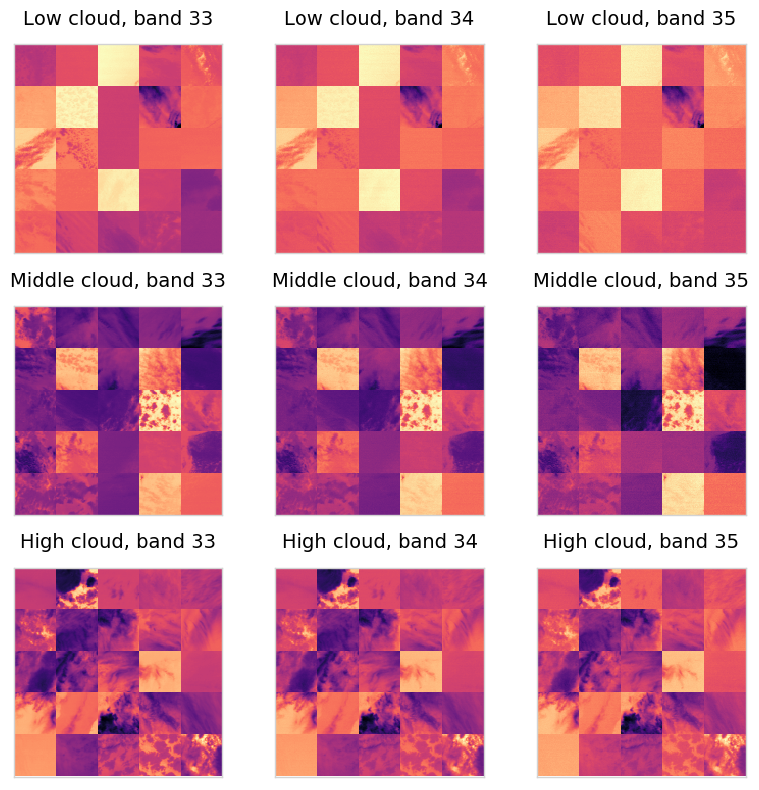

In [187]:
from matplotlib.colors import Normalize

clouds = ["Low cloud", "Middle cloud", "High cloud"]
titles = ["band 33", "band 34", "band 35"]
z_lims = [0.0, 2.0, 6.0, 20.0]

with plt.style.context(('/home/simonpf/.config/matplotlib/notebook')):
    f, axs = plt.subplots(3, 3, figsize = (8, 8))
    for i in range(3):
        for j in range(3):
            np.random.seed(10)
            inds = (y > z_lims[i]) * (y < [z_lims[i + 1]])
            inds = np.where(inds)[0]
            img = random_tile(x[:, j, :, :], inds, n = 5, nh = nh)
            norm = Normalize(vmin = x_min.ravel()[j],
                             vmax = x_max.ravel()[j])
            axs[i, j].imshow(img)
            axs[i, j].set_title(clouds[i] + ", " + titles[j])
            axs[i, j].set_aspect(1)
            axs[i, j].grid("off")
            axs[i, j].xaxis.set_visible(False)
            axs[i, j].yaxis.set_visible(False)
plt.tight_layout()
f.savefig("plots/tiles_cth.png", bbox_inches = "tight")

In [154]:
(y > z_lims[i]) * (y < z_lims[i + 1])

array([False, False, False, ..., False, False, False], dtype=bool)

In [181]:
def random_tile_rgb(x, inds, n = 10, nh = 20):
    
    h = x.shape[2]
    w = x.shape[3]
    
    image        = np.ones((h * n, w * n, 3))
    for i in range(n):
        for j in range(n):
            ind = np.random.choice(inds)
            im = x[ind, 0, :, :]
            image[i * h + (20 - nh): (i + 1) * h - (20 - nh),
                  j * h + (20 - nh): (j + 1) * h - (20 - nh), 0] \
            = im[20 - nh: 20 + nh + 1, 20 - nh: 20 + nh + 1]
            im = x[ind, 1, :, :]
            image[i * h + (20 - nh): (i + 1) * h - (20 - nh),
                  j * h + (20 - nh): (j + 1) * h - (20 - nh), 1] \
            = im[20 - nh: 20 + nh + 1, 20 - nh: 20 + nh + 1]
            im = x[ind, 2, :, :]
            image[i * h + (20 - nh): (i + 1) * h - (20 - nh),
                  j * h + (20 - nh): (j + 1) * h - (20 - nh), 2] \
            = im[20 - nh: 20 + nh + 1, 20 - nh: 20 + nh + 1]
    return image

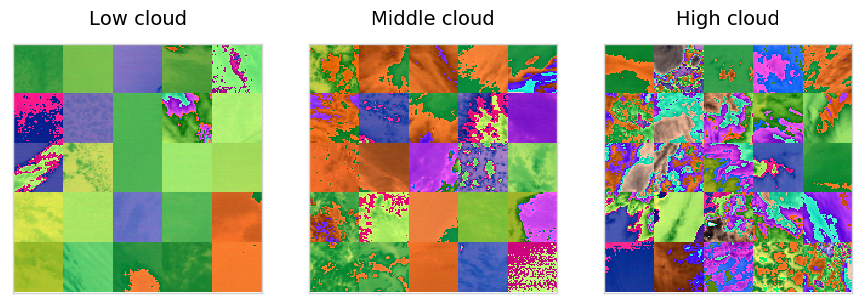

In [189]:
from matplotlib.colors import Normalize

clouds = ["Low cloud", "Middle cloud", "High cloud"]
titles = ["band 33", "band 34", "band 35"]
z_lims = [0.0, 2.0, 6.0, 20.0]

x_normed = (x - x_min) / (x_max - x_min)



with plt.style.context(('/home/simonpf/.config/matplotlib/notebook')):
    f, axs = plt.subplots(1, 3, figsize = (9, 3))
    for i in range(3):
        np.random.seed(10)
        inds = (y > z_lims[i]) * (y < [z_lims[i + 1]])
        inds = np.where(inds)[0]
        img = random_tile_rgb(x[:, :, :, :], inds, n = 5, nh = nh)
        axs[i].imshow(img)
        axs[i].set_title(clouds[i])
        axs[i].set_aspect(1)
        axs[i].grid("off")
        axs[i].xaxis.set_visible(False)
        axs[i].yaxis.set_visible(False)
plt.tight_layout()
f.savefig("plots/tiles_cth_2.png", bbox_inches = "tight")

### Cloud dreams

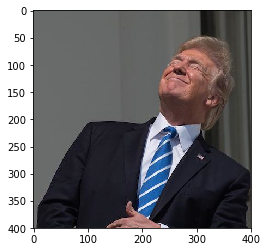

In [200]:
from scipy import misc
image = misc.imread("trump.png")
x = np.array(image[:400, -400:, :3], dtype = np.float32)

x_mins = np.min(x, axis = (0, 1, 2), keepdims = True)
x_max  = np.max(x, axis = (0, 1, 2), keepdims = True)
x = (x - x_mins) / x_max
plt.imshow(x)

In [202]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D
from keras import regularizers

keras.backend.set_image_data_format("channels_first")

def make_model_conv(input_dim = 41):
    model_conv = Sequential()
    model_conv.add(Conv2D(32, (3, 3),
                    input_shape = (3, input_dim, input_dim),
                    padding = 'same',
                    activation = 'relu'))
    if input_dim // 2 > 0:
        model_conv.add(MaxPooling2D(pool_size=(2)))
    model_conv.add(Conv2D(32, (3, 3),
                     padding = 'same',
                    activation = 'relu'))
    if input_dim // 4 > 0:
        model_conv.add(MaxPooling2D(pool_size=(2)))
    model_conv.add(Conv2D(64, (3, 3),
                     padding = 'same',
                    activation = 'relu'))
    model_conv.add(Flatten())
    model_conv.add(Dense(128, activation = 'relu'))
    model_conv.add(Dropout(0.2))
    model_conv.add(Dense(1, activation = None))
    model_conv.name = "conv_cth" + str(input_dim)
    return model_conv

In [ ]:
trump_model = make_model_conv(input_dim = 400)
cloud_model = keras.models.load_model("models/rgb_conv_41")